In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns
from datetime import datetime

import yfinance as yf

In [2]:
def stock_data2(ticker, start_date, end_date):

    df = yf.download(ticker, start = start_date, end = end_date, progress = False)
    df.reset_index(inplace=True)
    nrows = df.shape[0]
    df['5 MA'] = df['Adj Close'].rolling(5).mean()
    df['10 MA'] = df['Adj Close'].rolling(10).mean()
    df['20 MA'] = df['Adj Close'].rolling(20).mean()
    df['50 MA'] = df['Adj Close'].rolling(50).mean()
    df['100 MA'] = df['Adj Close'].rolling(100).mean()
    df['Daily Change (ln)'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
    df['Percent Return'] = df['Adj Close'].pct_change()

    return df

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  2 of 2 completed


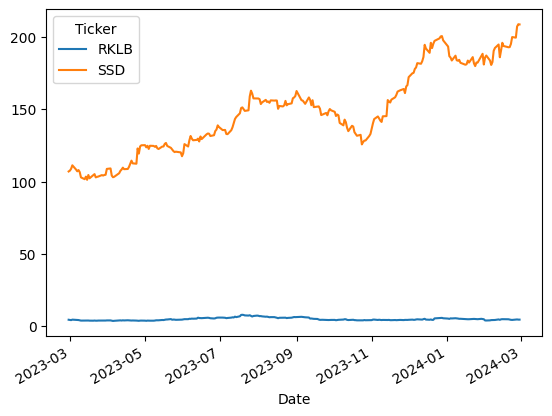

In [6]:
stocks_historical = yf.download(['SSD', 'RKLB'], start = "2023-02-28", end = "2024-03-01")
stocks_historical.loc[:,'Adj Close'].plot()
plt.show()

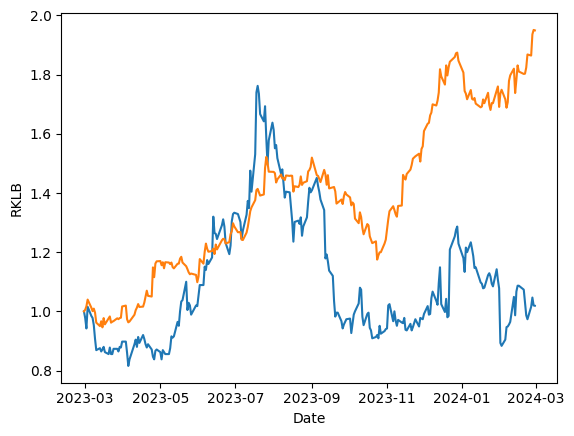

In [7]:
stocks_norm = stocks_historical.loc[:,'Adj Close']/stocks_historical.iloc[0]['Adj Close']

sns.lineplot(x = 'Date', y = 'RKLB', data = stocks_norm)
sns.lineplot(x = 'Date', y = 'SSD', data = stocks_norm)
plt.show()

In [37]:
end_date = datetime.now().strftime('%Y-%m-%d')
df = stock_data2('ANET', start_date = "2023-02-01", end_date = end_date)

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


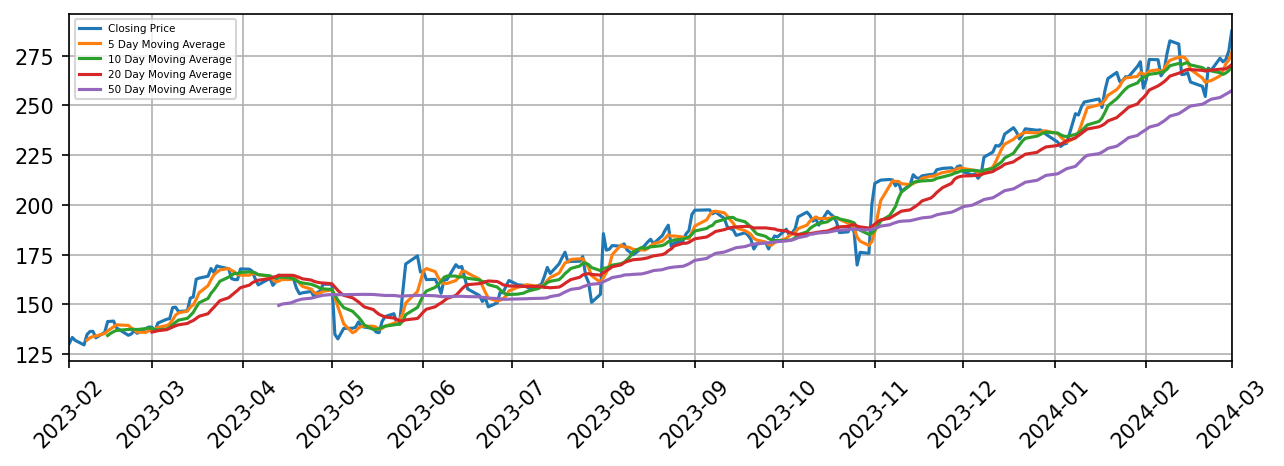

In [38]:
#df = df_ticker

nrows = df.shape[0]

fig, ax = plt.subplots(figsize = (10,3), dpi = 150)

#ax.plot(df['100 MA'], label = "100 Day Moving Average")
#ax.plot(df['50 MA'], label = "50 Day Moving Average")
#ax.plot(df['Date'], df['Daily Change (ln)'], label = "Daily Change")
ax.plot(df['Date'], df['Close'], label = "Closing Price")
ax.plot(df['Date'], df['5 MA'], label = "5 Day Moving Average")
ax.plot(df['Date'], df['10 MA'], label = "10 Day Moving Average")
ax.plot(df['Date'], df['20 MA'], label = "20 Day Moving Average")
ax.plot(df['Date'], df['50 MA'], label = "50 Day Moving Average")
ax.grid(True)
ax.legend(fontsize = 5)
plt.xticks(rotation = 45)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%M')

ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(months_fmt)
#ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(df['Date'][0], 'M')
datemax = np.datetime64(df['Date'][nrows - 1], 'M')# + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.

In [39]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,5 MA,10 MA,20 MA,50 MA,100 MA,Daily Change (ln),Percent Return
0,2023-02-01,125.489998,131.000000,123.739998,130.520004,130.520004,3750500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-02,131.550003,134.449997,130.500000,133.440002,133.440002,4741200,NaN,NaN,NaN,NaN,NaN,0.022125,0.022372
2,2023-02-03,130.869995,133.789993,130.294998,131.960007,131.960007,2084900,NaN,NaN,NaN,NaN,NaN,-0.011153,-0.011091
3,2023-02-06,130.740005,132.740005,129.089996,129.690002,129.690002,2104800,NaN,NaN,NaN,NaN,NaN,-0.017352,-0.017202
4,2023-02-07,129.520004,135.740005,129.009995,134.910004,134.910004,2299700,132.104004,NaN,NaN,NaN,NaN,0.039461,0.040250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2024-03-04,288.000000,291.290009,286.496002,287.940002,287.940002,2003200,279.660004,272.256001,271.306004,258.533201,233.709601,0.000695,0.000695
273,2024-03-05,284.029999,284.079987,275.100006,280.470001,280.470001,2377500,281.372003,274.342003,271.681004,259.479401,234.567001,-0.026285,-0.025943
274,2024-03-06,284.309998,286.779999,280.500000,284.500000,284.500000,1971300,283.638000,277.343002,272.661503,260.462601,235.493401,0.014266,0.014369
275,2024-03-07,286.000000,288.859985,282.200012,286.480011,286.480011,2338700,285.426001,279.115002,273.633004,261.427002,236.428101,0.006936,0.006960


In [40]:
np.mean(df['Percent Return'])

0.003069280713591113

In [41]:
[np.mean(df.loc[:,'Percent Return'].dropna()), np.var(df.loc[:,'Percent Return'].dropna()), np.median(df.loc[:,'Percent Return'].dropna())]

[0.003069280713591113, 0.0007938657101747677, 0.001951750228402216]

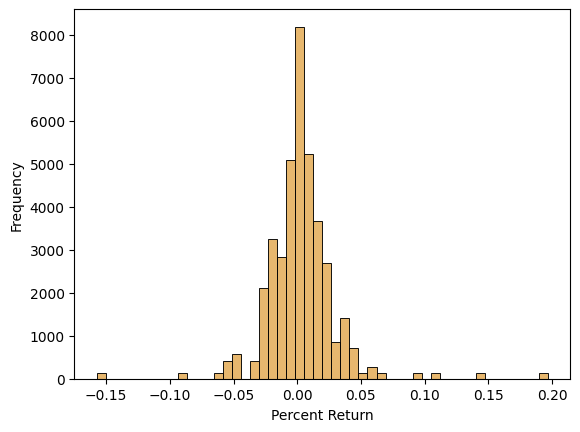

In [44]:
sns.histplot(
    df, color = '#e09f3e',
    x = 'Percent Return',
    stat = 'frequency'
)
plt.show()

In [45]:
np.quantile(df.loc[:,'Percent Return'].dropna(), [0,0.25,0.5,0.75,1]) 

array([-0.15721783, -0.00938934,  0.00195175,  0.01404983,  0.19678899])